In [1]:
# Wszelkiej maści importy ;) 
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stanza


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Zadanie 1 Pobieranie Tweetów

In [ ]:

bearer = ''
client = tweepy.Client(bearer)

#ograniczenia tego API to totalna porażka, nie mam całego dnia na takie zabawy... Id kantewesta wyciągnięte z przeglądarki
#a od 429 Too Many Requests
#Too Many Requests
#można conajmniej oszaleć

#kanye_west_id = client.get_user(username='kanyewest').data.id
#kanye_west_tweets = client.get_users_tweets(id='169686021', tweet_fields=['created_at', 'text'], max_results=100).data
#kanyego odpuszczam, bo nie ma postów
#moje granice cierpliwośći do tego zadania sięgają zenitu:
#429 Too Many Requests
#Usage cap exceeded: Monthly product cap

elon_musk_tweets = client.get_users_tweets(id='44196397', tweet_fields=['text'], max_results=100, exclude=["retweets"]).data

TooManyRequests: 429 Too Many Requests
Too Many Requests

In [3]:
tweets_data = []

for tweet in elon_musk_tweets:
    tweets_data.append(tweet.text)

with open('./elonMusk.json', 'w') as f:
            json.dump(tweets_data, f, indent=4)

NameError: name 'elon_musk_tweets' is not defined

In [4]:
#załaduj jsona z tweetami
df_elon_musk_tweets_from_file = pd.read_json('./elonMusk.json')
elon_musk_tweets_from_file = df_elon_musk_tweets_from_file[0].tolist()

## Zadanie 2 SpaCy

In [5]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:12
     -- ------------------------------------- 0.8/12.8 MB 1.1 MB/s eta 0:00:11
     --- ------------------------------------ 1.0/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.3/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.3/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:11
     ----- ---------------------------------- 1.8/12.8 MB 1.1 MB/s eta 0:00:10
     ------ --------------------------------- 2.1/12.8 MB 1.1 MB/s eta 0:00:10
     ------- -------------------------------- 2.4/12.8 MB 1.1 MB/s eta 0:00:10
     -------- ------------------------------- 2.6/12.8 MB 1.1 MB/s eta 0:


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
def showPlotWithSentimentsCount(sentiments):
    #Wykres z podziałem na pozytywne, negatywne i neutralne wraz z ilością
    sentymenty = {"Positive": 0, "Negative": 0, "Neutral": 0}
    for sentyment in sentiments:
        if sentyment in sentymenty:
            sentymenty[sentyment] += 1
                
    plt.bar(sentymenty.keys(), sentymenty.values())
    plt.xlabel("Sentyment")
    plt.ylabel("Liczba tweetów")
    plt.title("Ilość tweetów z podziałem na sentymenty")
    plt.show()


RT @LibertyPillMeme: @elonmusk The Left right now https://t.co/YMScDdYTH9
Sentiment: 0.14285714285714285 | Positive
---
@WallStreetMav It’s crazy. Retirees are having their money stolen!
Sentiment: -0.75 | Negative
---
@amuse I wonder who wrote this
Sentiment: 0.0 | Neutral
---
RT @amuse: SCRIPTED: Paid protesters at Tesla Takedown events are given scripts by the Soros-backed organizers. https://t.co/uOUR9mR6cs
Sentiment: 0.0 | Neutral
---
It is time to arrest those funding the attacks. 

Arresting their puppets and paid foot-soldiers won’t stop the violence. 

 https://t.co/R4aHg4Q5Kw
Sentiment: -0.05 | Negative
---
RT @StartupArchive_: Marc Andreessen on what makes Elon impossible to compete with

“I’m not aware of another CEO who operates the way he d…
Sentiment: -0.3958333333333333 | Negative
---
RT @ScottPresler: BREAKING: A Madison-based Wisconsin appeals court

rejected AG Kaul from blocking Elon Musk’s get out the vote efforts.…
Sentiment: 0.0 | Neutral
---
They literally are p

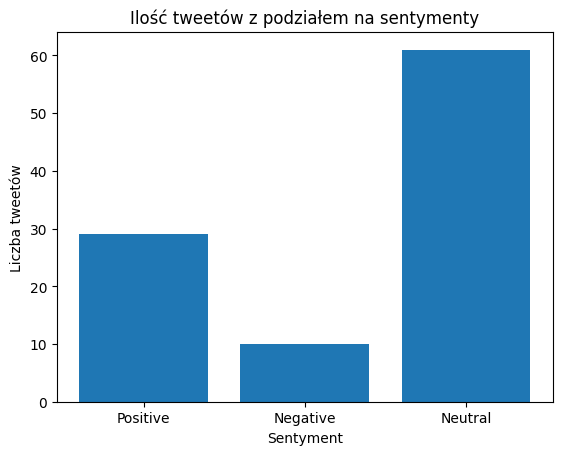

In [7]:
#https://spacy.io/universe/project/spacy-textblob/ link do dokumentacji
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

spacyEnts = {}

def getSentiment(text):
    doc = nlp(text)
    for ent in doc.ents:
        #TUTAJ PRZY OKAZJI WYCIĄGAM NER :))))
        #spacyEnts.append(f'entity: {ent.text} type: {ent.label_}')
        spacyEnts[ent.text] = ent.label_
    return doc._.blob.polarity

def changeToPositiveNegativeNeutral(value):
    if value > 0:
        return 'Positive'
    elif value < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
sentiments = []
for tweet in elon_musk_tweets_from_file:
    print(f'{tweet}')
    sentiment = getSentiment(tweet)
    sentiments.append( changeToPositiveNegativeNeutral(sentiment))
    print(f'Sentiment: {sentiment} | {changeToPositiveNegativeNeutral(sentiment)}')
    print('---')

showPlotWithSentimentsCount(sentiments)

## Zadanie 3 Analiza sentymentu z biblioteką Stanza

In [8]:
stanza.download('en') # download English model


2025-03-30 21:50:33 INFO: Downloaded file to C:\Users\adria\stanza_resources\resources.json
2025-03-30 21:50:33 INFO: Downloading default packages for language: en (English) ...
2025-03-30 21:50:34 INFO: File exists: C:\Users\adria\stanza_resources\en\default.zip
2025-03-30 21:50:36 INFO: Finished downloading models and saved to C:\Users\adria\stanza_resources


2025-03-30 21:50:36 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-03-30 21:50:36 INFO: Downloaded file to C:\Users\adria\stanza_resources\resources.json
2025-03-30 21:50:36 WARNING: Language en package default expects mwt, which has been added
2025-03-30 21:50:37 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| lemma     | combined_nocharlm |
| sentiment | sstplus_charlm    |

2025-03-30 21:50:37 INFO: Using device: cuda
2025-03-30 21:50:37 INFO: Loading: tokenize
2025-03-30 21:50:38 INFO: Loading: mwt
2025-03-30 21:50:38 INFO: Loading: lemma
2025-03-30 21:50:39 INFO: Loading: sentiment
2025-03-30 21:50:40 INFO: Done loading processors!


RT @LibertyPillMeme: @elonmusk The Left right now https://t.co/YMScDdYTH9
1
---
@WallStreetMav It’s crazy. Retirees are having their money stolen!
1
---
@amuse I wonder who wrote this
1
---
RT @amuse: SCRIPTED: Paid protesters at Tesla Takedown events are given scripts by the Soros-backed organizers. https://t.co/uOUR9mR6cs
1
---
It is time to arrest those funding the attacks. 

Arresting their puppets and paid foot-soldiers won’t stop the violence. 

 https://t.co/R4aHg4Q5Kw
0
---
RT @StartupArchive_: Marc Andreessen on what makes Elon impossible to compete with

“I’m not aware of another CEO who operates the way he d…
0
---
RT @ScottPresler: BREAKING: A Madison-based Wisconsin appeals court

rejected AG Kaul from blocking Elon Musk’s get out the vote efforts.…
1
---
They literally are paid “protesters”!
 https://t.co/wx0JFXWNFD
1
---
@EndWokeness Maybe we should do a dance off 🕺
1
---
@visegrad24 Looking into it
1
---
RT @Nocapongod_: Anti-Trump protest @ City Hall Los Angeles https:

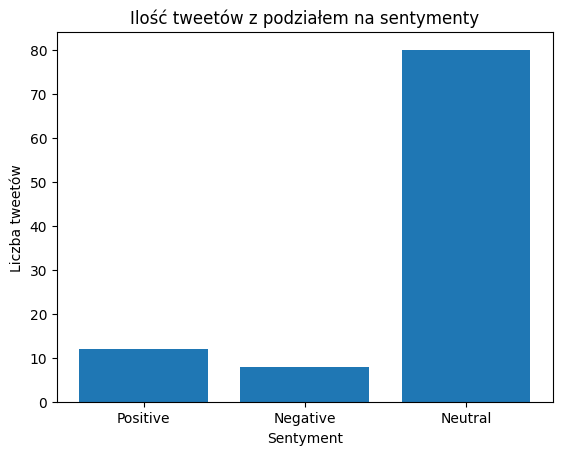

In [9]:
nlp_stanza = stanza.Pipeline('en', processors='tokenize,lemma, sentiment') # initialize English neural pipeline

def getSentimentWithStanza(txt):
    doc = nlp_stanza(txt)
    return doc.sentences[0].sentiment

def convertStanzaSentiments(sentiment):
    if sentiment == 0:
        return 'Negative'
    elif sentiment == 1:
        return 'Neutral'
    elif sentiment == 2:
        return 'Positive'


stanza_sentiments = []
for tweet in elon_musk_tweets_from_file:
    print(tweet)
    sentiment = getSentimentWithStanza(tweet)
    print(sentiment)
    stanza_sentiments.append(convertStanzaSentiments(sentiment))
    print('---')

showPlotWithSentimentsCount(stanza_sentiments)

## Porównanie sentymentów SpaCy vs Stanza

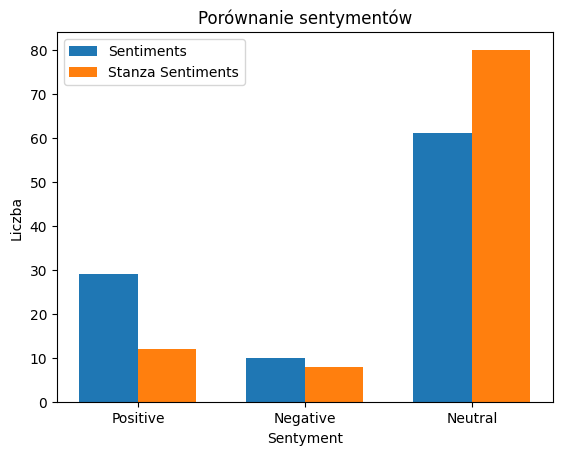

In [10]:
sentymenty = ["Positive", "Negative", "Neutral"]
liczby_sentiments = [sentiments.count(s) for s in sentymenty]
liczby_stanza_sentiments = [stanza_sentiments.count(s) for s in sentymenty]

x = np.arange(len(sentymenty))
szerokosc = 0.35

plt.bar(x - szerokosc/2, liczby_sentiments, szerokosc, label="Sentiments")
plt.bar(x + szerokosc/2, liczby_stanza_sentiments, szerokosc, label="Stanza Sentiments")

plt.xticks(x, sentymenty)
plt.xlabel("Sentyment")
plt.ylabel("Liczba")
plt.title("Porównanie sentymentów")
plt.legend()
plt.show()

Podsumowując o ile negatywny sentyment jest dość zbliżony to rozstrzał pomiędzy positive, a negative jest duży. 

## Zadanie 4 NER

In [11]:
nlp_ner = stanza.Pipeline(lang='en', processors_kwargs={'tokenize': 'stopwords', 'ner': {'type': 'ontonotes'}})
# https://stanfordnlp.github.io/stanza/ner.html

def getStanzaEntities(text, stanzaEnts):
    doc = nlp_ner(text)
    for ent in doc.ents:
        #stanzaEnts.append(f'entity: {ent.text} type: {ent.type}')
        stanzaEnts[ent.text] = ent.type

stanzaEnts = {}
for tweet in elon_musk_tweets_from_file:
    getStanzaEntities(tweet, stanzaEnts)

2025-03-30 21:50:47 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-03-30 21:50:47 INFO: Downloaded file to C:\Users\adria\stanza_resources\resources.json
2025-03-30 21:50:48 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2025-03-30 21:50:48 INFO: Using device: cuda
2025-03-30 21:50:48 INFO: Loading: tokenize
2025-03-30 21:50:48 INFO: Loading: mwt
2025-03-30 21:50:48 INFO: Loading: pos
2

Porównanie Spacy i Stanza (NER)

Podsumowanie: SpaCy rozponało o 10 więcej encji, aczkolwiek często są to dane bez sensu, np "u" rozpoznało jako DATE, albo @lindayaX jako GPE, co widać, że jest nieprawdą. W sytuacji, gdzie spacy i stanza wskazały NER to zazwyczaj typ encji się zgadza

In [12]:
print(f"Spacy Entities: {len(spacyEnts)}")
print(f"Stanza Entities: {len(stanzaEnts)}")

klucze = set(spacyEnts.keys()) | set(stanzaEnts.keys())  # Wszystkie unikalne klucze
dane = []

for klucz in klucze:
    wystepuje1 = 1 if klucz in spacyEnts else 0
    wystepuje2 = 1 if klucz in stanzaEnts else 0
    wartosc1 = spacyEnts.get(klucz, None)  # Pobierz wartość lub None
    wartosc2 = stanzaEnts.get(klucz, None)  # Pobierz wartość lub None
    dane.append({
        "Klucz": klucz,
        "Spacy_wystepuje": wystepuje1,
        "Spacy_wartosc": wartosc1,
        "Stanza_wystepuje": wystepuje2,
        "Stanza_wartosc": wartosc2,
    })

df = pd.DataFrame(dane)
pd.set_option('display.max_rows', None)
df

Spacy Entities: 116
Stanza Entities: 106


,Klucz,Spacy_wystepuje,Spacy_wartosc,Stanza_wystepuje,Stanza_wartosc
0,$351M,1,MONEY,1,MONEY
1,WISCONSIN,0,None,1,GPE
2,VOTE,1,ORG,0,None
3,DOGE,1,ORG,1,PERSON
4,UK,1,GPE,1,GPE
5,two,1,CARDINAL,1,CARDINAL
6,the Navy Seals,1,ORG,1,ORG
7,Congress,1,ORG,1,ORG
8,Took @SpaceX 4,0,None,1,PRODUCT
9,@lindayaX,1,GPE,0,None


## Zadanie 5

### NER przy użyciu stanza na datasecie amazon reviews

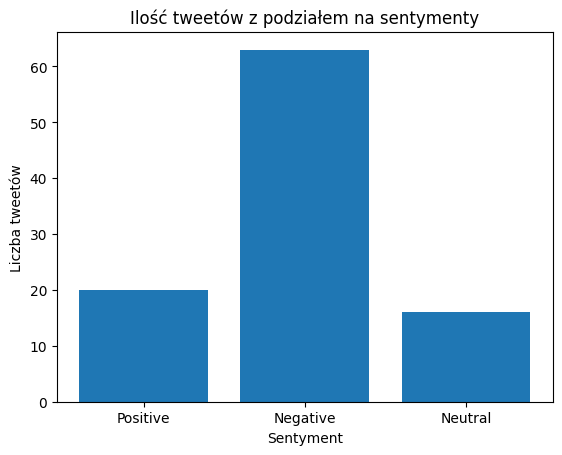

In [13]:
df_amazon = pd.read_csv("./amazon_reviews.csv")
X = df_amazon.iloc[1:100, 1].values
y = df_amazon.iloc[1:100, 0].values

stanza_sentiments_amazon = []
for review in X:
    sentiment = getSentimentWithStanza(review)
    stanza_sentiments_amazon.append(convertStanzaSentiments(sentiment))

showPlotWithSentimentsCount(stanza_sentiments_amazon)

### Klasyfikator SVM z kernelem RBF (pojęcie nie mam dlaczego go wybrałem, na kursie mówili, że jest najbardziej uniwersalny :D)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [15]:
X_svm = df_amazon.iloc[100:5100, 1].values
y_svm = df_amazon.iloc[100:5100, 0].values

#zamiana na stringi, bo inaczej nie działa i rzuca błędami, bo robi mi się float zamiast str
X_svm_str = [str(item) if isinstance(item, float) else item for item in X_svm]

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_svm_str)

sentymenty_na_liczby = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

y_labels = [sentymenty_na_liczby[sentyment] for sentyment in y_svm]


svm_classifier = SVC(kernel='rbf', C=1.0)

epochs = 20
for epoch in range(epochs):
    svm_classifier.fit(X_train_vectors, y_labels)

#### Użycie zaimplementowanego SVM do analizy sentymentu na tych samych 100 opiniach z amazonDataSet co wyżej stanza

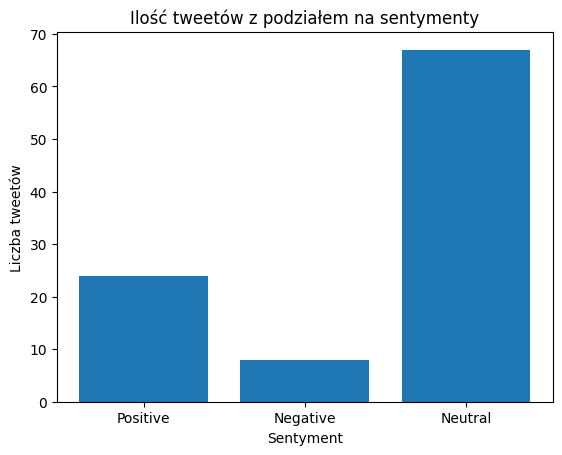

In [ ]:
df_amazon = pd.read_csv("./amazon_reviews.csv")
X = df_amazon.iloc[1:100, 1].values
y = df_amazon.iloc[1:100, 0].values

X_pred_svm_str = [str(item) if isinstance(item, float) else item for item in X]
X_pred_vectors = vectorizer.transform(X_pred_svm_str)

y_pred_svm = svm_classifier.predict(X_pred_vectors)

svm_sentiments_amazon = []
for sent in y_pred_svm:
    svm_sentiments_amazon.append(convertStanzaSentiments(sent))

showPlotWithSentimentsCount(svm_sentiments_amazon)

#### Porówanie stanzy i zaimplementowanego svm do analizy sentymentu pierwszych 100 recenzji z amazon dataset

In [21]:

dane = []

for index in range(len(y_pred_svm)):
    dane.append({
        "Review": X[index],
        "Stanza sentyment": stanza_sentiments_amazon[index],
        "SVM sentyment": svm_sentiments_amazon[index]
    })

df = pd.DataFrame(dane)
pd.set_option('display.max_rows', None)
df

,Review,Stanza sentyment,SVM sentyment
0,i ve learned this lesson again open the packag...,Negative,Neutral
1,it is so slow and lags find better option,Negative,Neutral
2,roller ball stopped working within months of m...,Negative,Neutral
3,i like the color and size but it few days out ...,Negative,Neutral
4,overall love this mouse the size weight clicki...,Negative,Positive
5,it stopped working,Negative,Neutral
6,my son uses school issued chromebook for schoo...,Negative,Positive
7,loved this cute little mouse but it broke afte...,Neutral,Neutral
8,should ve spent the money to get quality produ...,Negative,Negative
9,beautifully produced and lovely to look at for...,Positive,Neutral


Podsumowując, mój model nie ma szans ze stanzą w analizie sentymentu. Np 'the mouse is very slim but is so cheaply made ...	' mój model ocenił jako positive, a to zdecydowanie negatyw.